In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [28]:
yi, yf = xi, xf = (0, 1)
h = 0.02

a = 0.00028
b = 0.005
tau = 0.1
k = -0.005

lim_yi = lim_yf = 0
lim_xi = lim_xf = 0

tf = 10
dt = 0.01

In [44]:
def nablasq(fun,h):
    for i in range(0,fun.shape[0]-1):
        for j in range(0,fun.shape[1]-1):
            res = (fun[i+1,j]+fun[i-1,j]+fun[i,j+1]+fun[i,j-1]-4*fun[i,j])/(h**2)
    return res

In [ ]:
def nablasq(fun,h):
    res = np.zeros(fun.shape)
    for i in range(0,fun.shape[0]-1):
        for j in range(0,fun.shape[1]-1):
            res[i,j] = (fun[i+1,j]+fun[i-1,j]+fun[i,j+1]+fun[i,j-1]-4*fun[i,j])/(h**2)
    return res

In [46]:
def nablasq(fun,h,i,j):
    res = (fun[i+1,j]+fun[i-1,j]+fun[i,j+1]+fun[i,j-1]-4*fun[i,j])/(h**2)
    return res

In [58]:
x, y = np.meshgrid(np.arange(xi, xf+h, h),
                   np.arange(yi, yf+h, h))

phi = np.random.rand(x.shape[0], x.shape[1])
psi = np.random.rand(x.shape[0], x.shape[1])

for t in np.arange(0+dt,tf,dt):
    clear_output(wait=True)

    phidt = psidt = np.zeros(phi.shape)

    for fun in (phi,psi):
        fun[0,:] = fun[1,:]
        fun[-1,:] = fun[-2,:]
        fun[:,0] = fun[:,1]
        fun[:,-1] = fun[:,-2]
    
    for i in range(0, phi.shape[0]-1):
        for j in range(0, phi.shape[0]-1):
           phidt[i,j] = phi[i,j] + dt*(a*nablasq(phi,h,i,j)+phi[i,j]-(phi[i,j]**3)-psi[i,j]+k)
           print('a',phi[i,j])
           print(nablasq(phi,h,i,j))    
           psidt[i,j] = psi[i,j] + dt*(b*nablasq(psi,h,i,j)+phi[i,j]-psi[i,j])/tau 

    #phidt = phi + dt*(a*nablasq(phi,h)+phi-(phi**3)-psi+k)
    #psidt = psi + dt*(b*nablasq(psi,h)+phi-psi)/tau

    psi = psidt
    phi = phidt

    plt.imshow(phi, cmap='BuPu')
    plt.colorbar()
    plt.show()

41181717617900.04
-2.157627051232753e+17
41181717617900.04
-4.6182281124389696e+17
-113368169341148.89
1.2899691986267873e+18
158916409925298.12
-1.85637997044868e+18
-172994046525200.88
2.0836899259643162e+18
165943342503351.84
-2.0366074864349143e+18
-155739853535378.84
1.8810842092621048e+18
152545039230330.1
-1.745145325618446e+18
-150091000815103.75
1.610137334633183e+18
132273385631616.73
-1.3453982444640154e+18
-87497938642226.56
8.472323416287169e+17
19293527333562.45
-1.5523940750379213e+17
52378855504301.44
-5.396406413146262e+17
-101506031958830.36
1.0060570969149179e+18
114201831196638.67
-1.1336813328939556e+18
-98059795487662.81
9.994285133562022e+17
70559371815554.7
-7.555995628075759e+17
-40758737726651.336
4.740133915449385e+17
7872598120776.482
-1.4712369569258723e+17
24895313506054.223
-1.8135870405654406e+17
-44059125081960.61
3.681587159745495e+17
35935140790268.625
-2.8118827258369216e+17
618535899405.8517
-7.26806971748147e+16
-51540968798608.17
5.417777722076372

KeyboardInterrupt: 

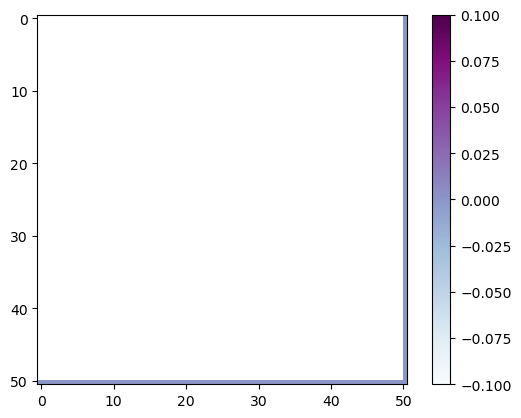

In [50]:
plt.imshow(phi+psi, cmap='BuPu', interpolation='bilinear')
plt.colorbar()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

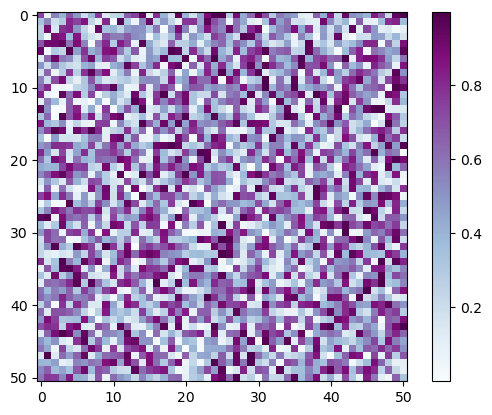

In [35]:
plt.imshow(phi, cmap='BuPu')
plt.colorbar()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

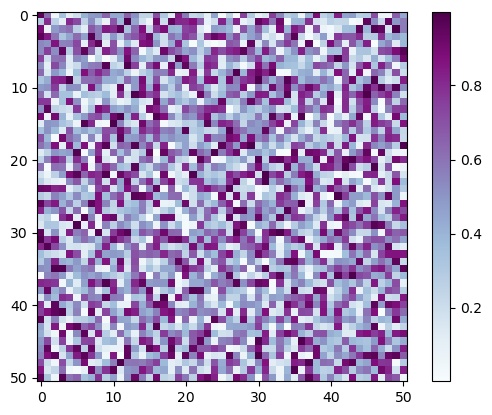

In [36]:
plt.imshow(psi, cmap='BuPu')
plt.colorbar()
plt.show